In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bezier_utils.core import bezier_curve
from bezier_utils.attributes import osculating_circle_center
from bezier_utils.basic import extract_bezier_curves
from bezier_utils.display import plot_bezier_curves, plot_bezier_curves_by_cross_linear, plot_bezier_curves_by_curvature
from bezier_utils.circle_approx import process_bezier_and_circles
from bezier_utils.mergeBezier import merge_beziers, plot_beziers

Number of loops detected: 1


c:\Data\Projects\Adobe_Gensolve\bezier_utils\attributes.py:22: RuntimeWarning: divide by zero encountered in divide
  radius_of_curvature = 1 / np.abs(curvature)
c:\Data\Projects\Adobe_Gensolve\bezier_utils\attributes.py:29: RuntimeWarning: invalid value encountered in divide
  normal /= np.linalg.norm(normal, axis=1, keepdims=True)


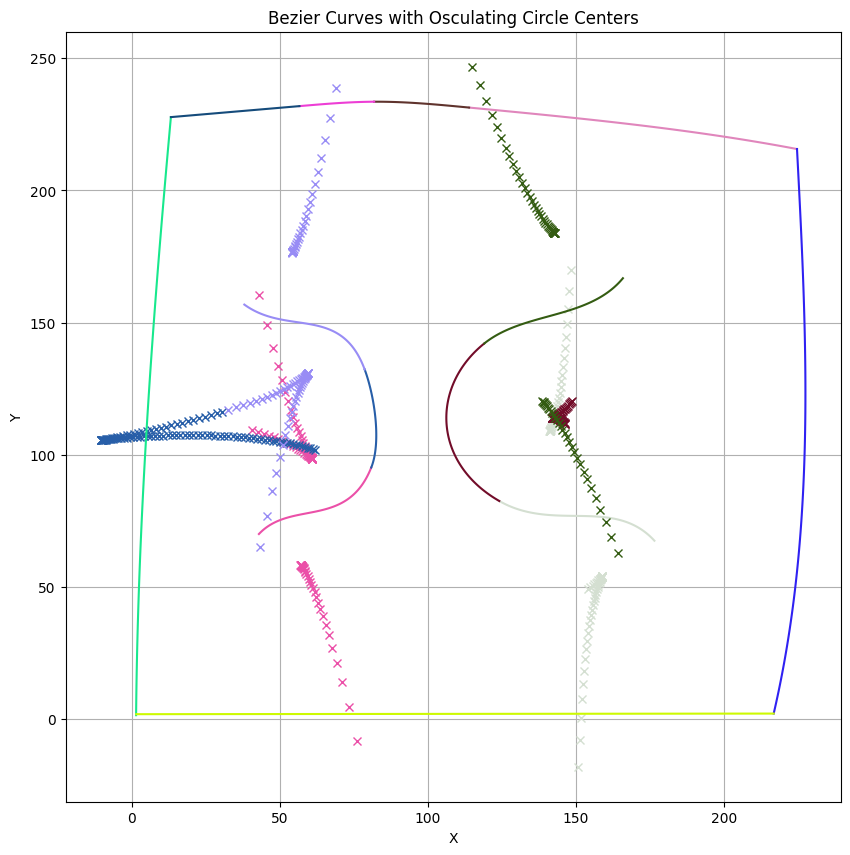

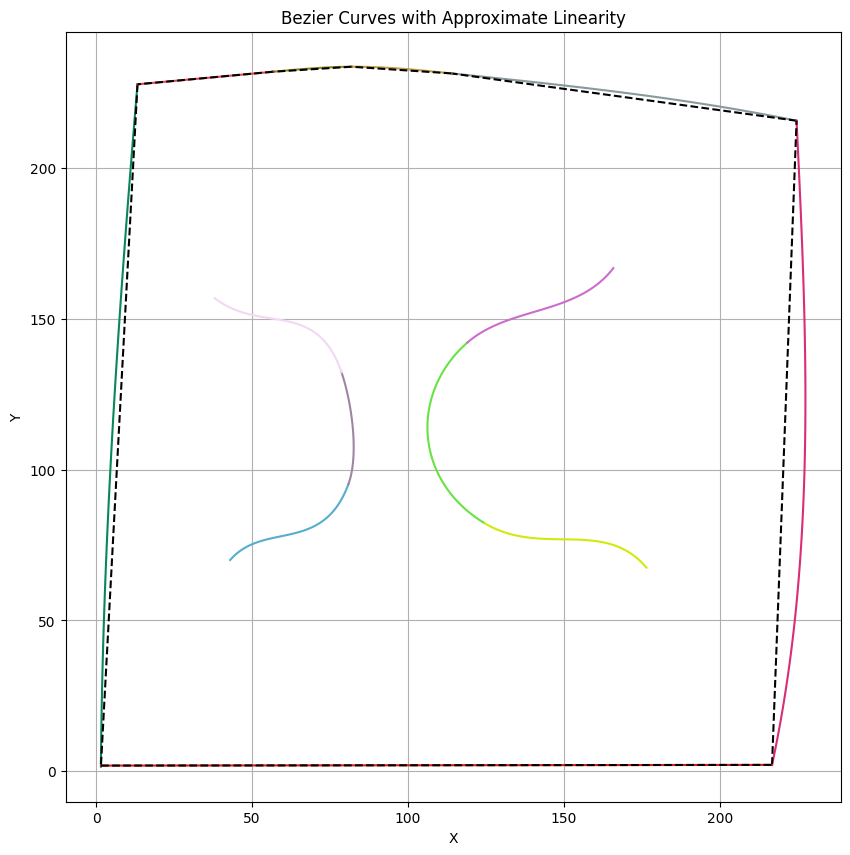

In [2]:
# print(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0]))
non_looped_curves, looped, circle_fits = process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(non_looped_curves)
plot_bezier_curves(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0)
plot_bezier_curves_by_cross_linear(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0, linear_tolerance=0.0525, show_centers=False)

[6.66595603e+01 6.66574729e+01 6.63426938e+01 6.60694988e+01
 6.18142197e+01 5.76851509e+01 5.34693531e+01 5.21255978e+01
 5.07643098e+01 4.94819844e+01 4.91365562e+01 4.87145953e+01
 4.81370315e+01 3.67948784e+01 3.84408367e+01 3.90919016e+01
 3.99837659e+01 4.29791232e+01 4.60403778e+01 4.90396183e+01
 5.03659428e+01 5.17456318e+01 5.30322413e+01 4.91789822e+01
 4.81105808e+01 4.72837573e+01 4.65163124e+01 4.37837015e+01
 4.09265442e+01 3.81959333e+01 3.71232170e+01 3.59413751e+01
 3.47396592e+01 3.46562754e+01 3.45203962e+01 3.44935218e+01
 2.74075713e+01 2.13600618e+01 1.43189528e+01 1.39301720e+01
 1.40066335e+01 1.38293665e+01 7.06248194e+00 1.28966894e+00
 5.48454719e+00 5.87209440e+00 5.79463284e+00 5.93914273e+00
 1.30085793e+01 1.91846400e+01 2.61854736e+01 2.65134649e+01
 2.64370033e+01 2.67232892e+01 2.95474214e+01 3.17839485e+01
 3.42675401e+01 3.78282076e+01 4.13251932e+01 4.48503188e+01
 4.55621234e+01 4.64257729e+01 4.71742082e+01 4.74342323e+01
 4.74407053e+01 4.763578

C:\Users\shubh\AppData\Local\Temp\ipykernel_18128\594654018.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


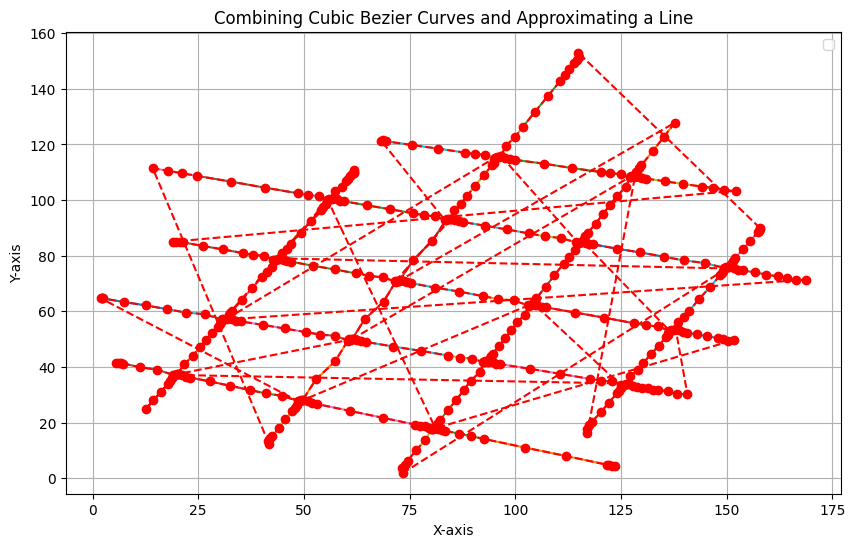

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def combine_cubic_bezier_curves(control_points, tolerance=0.7):
    """
    Combine nearly identical starting or ending Bezier curve control points.
    Check if they form an approximate line within a given tolerance.
    
    Parameters:
    control_points (list of np.array): List of control points of the cubic Bezier curves.
    tolerance (float): Tolerance for combining points and line approximation.
    
    Returns:
    bool: True if the combined control points form an approximate line.
    np.array: Combined control points.
    np.poly1d: Fitted line equation if points form an approximate line.
    """
    # Combine nearly identical control points
    combined_points = [control_points[0][0]]
    for points in control_points:
        for point in points:
            # print(distance.euclidean(combined_points[-1], point) )
            if distance.euclidean(combined_points[-1], point) > tolerance:
                combined_points.append(point)
    
    combined_points = np.array(combined_points)
    
    # Check if combined points form an approximate line
    if len(combined_points) < 2:
        return False, combined_points, None

    # Fit a line to the combined points
    line_params = np.polyfit(combined_points[:, 0], combined_points[:, 1], 1)
    fitted_line = np.poly1d(line_params)
    
    # Calculate the distance of each point from the fitted line
    deviations = np.abs(fitted_line(combined_points[:, 0]) - combined_points[:, 1])
    
    print(deviations)
    # Check if all deviations are within the tolerance
    if np.all(deviations <= tolerance):
        return True, combined_points, fitted_line
    else:
        return False, combined_points, None

# Example usage
control_points = extract_bezier_curves('data/problems/frag2.svg')[0]

tolerance = 0.01
is_line, combined_points, fitted_line = combine_cubic_bezier_curves(control_points, tolerance)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original Bezier curves control points
for points in control_points:
    plt.plot(points[:, 0], points[:, 1])

# Plot the combined points
plt.plot(combined_points[:, 0], combined_points[:, 1], 'ro--')

if is_line:
    # Plot the approximated line
    x_vals = np.linspace(np.min(combined_points[:, 0]), np.max(combined_points[:, 0]), 100)
    y_vals = fitted_line(x_vals)
    plt.plot(x_vals, y_vals, 'r--', label='Approximated Line')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Combining Cubic Bezier Curves and Approximating a Line')
plt.grid(True)
plt.show()


# combine_cubic_bezier_curves(extract_bezier_curves('data/problems/frag1.svg')[0])

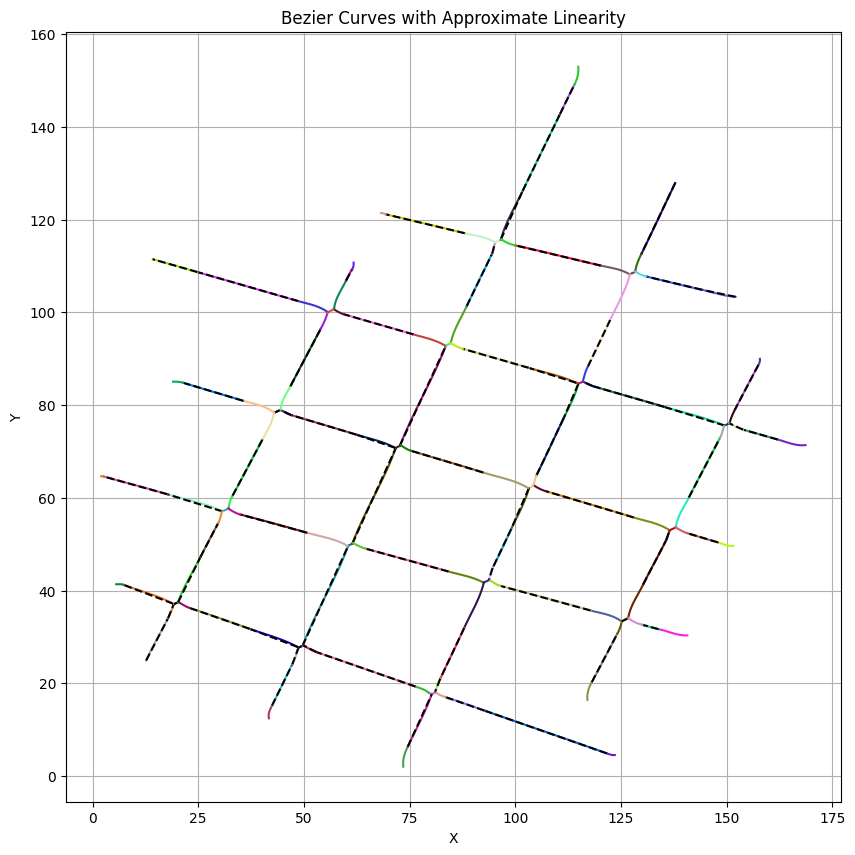

In [55]:
plot_bezier_curves_by_cross_linear(extract_bezier_curves('data/problems/frag2.svg')[0],extract_bezier_curves('data/problems/frag1.svg')[1], threshold=100.0, linear_tolerance=0.027, show_centers=False)

rem [array([[41.942, 68.98 ],
       [37.584, 74.219],
       [33.91 , 80.   ],
       [31.114, 86.269]]), array([[ 31.114,  86.269],
       [ 23.136, 104.156],
       [ 22.448, 128.023],
       [ 30.39 , 146.018]]), array([[ 30.39 , 146.018],
       [ 32.226, 150.179],
       [ 34.409, 154.115],
       [ 36.891, 157.808]]), array([[176.5  ,  67.5  ],
       [171.555,  60.218],
       [165.893,  53.421],
       [158.893,  48.348]]), array([[158.893,  48.348],
       [125.487,  24.137],
       [ 69.766,  35.53 ],
       [ 41.942,  68.98 ]]), array([[ 36.891, 157.808],
       [ 64.31 , 198.601],
       [128.306, 209.766],
       [166.5  , 167.5  ]]), array([[42.964, 70.031],
       [53.818, 82.981],
       [72.618, 71.863],
       [80.894, 95.184]]), array([[ 80.894,  95.184],
       [ 84.384, 105.02 ],
       [ 81.922, 122.488],
       [ 78.675, 132.286]]), array([[ 78.675, 132.286],
       [ 70.545, 156.818],
       [ 52.746, 144.905],
       [ 38.041, 156.835]]), array([[166.5  , 167.

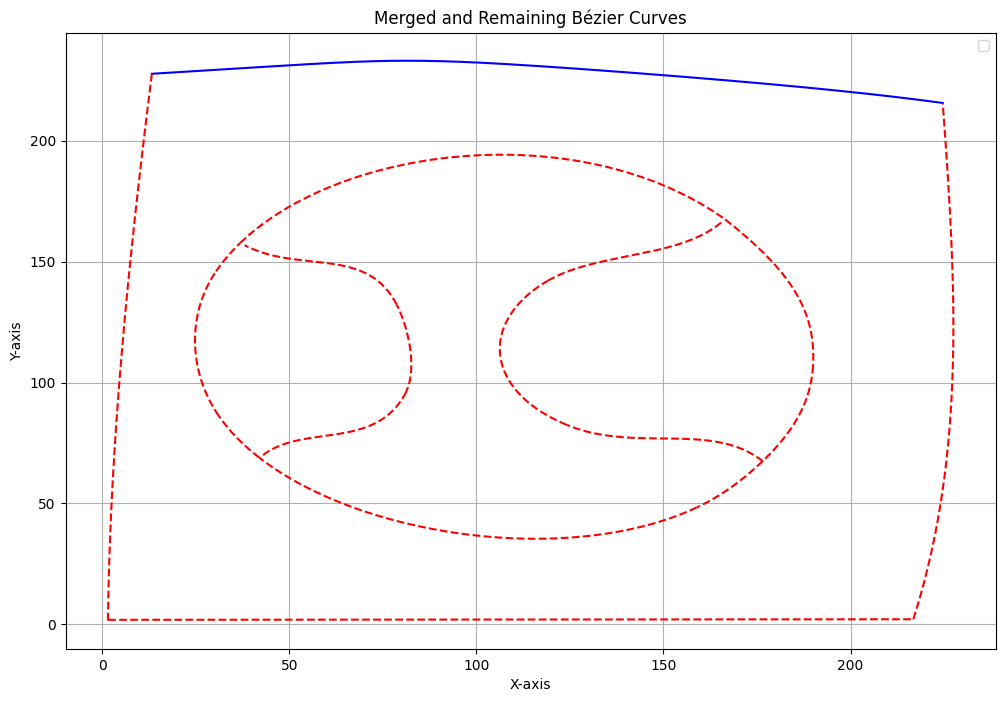

In [6]:
beziers = extract_bezier_curves('data/problems/frag0.svg')[0]

merged_beziers, remaining_beziers = merge_beziers(beziers)

print("rem" , remaining_beziers)

print("Merged Bézier Curves:")
for i, curve in enumerate(merged_beziers):
    print(f"Curve {i+1} with control points: {curve}")

print("\nRemaining Bézier Curves:")
for i, curve in enumerate(remaining_beziers):
    print(f"Curve {i+1} with control points: {curve}")

plot_beziers(merged_beziers, remaining_beziers, is_3d=False)